In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('task_about_time.tsv', sep='\t')

Осмотрим таблицу.

In [38]:
data.head()

,worker,project_id,task_id,resolution_type,start_ts,end_ts
0,login1,1,task_1,resolution_1,1576865064,1576867011
1,login1,2,task_2,resolution_1,1576837986,1576838385
2,login1,1,task_3,resolution_1,1576078746,1576079378
3,login1,1,task_4,resolution_2,1576504430,1576504564
4,login1,1,task_5,resolution_1,1575398193,1575398809


Переведем время на выполнение задачи в число 30-секундных интервалов.

In [39]:
data['N_num'] = (data.end_ts - data.start_ts)/30

In [40]:
data.head()

,worker,project_id,task_id,resolution_type,start_ts,end_ts,N_num
0,login1,1,task_1,resolution_1,1576865064,1576867011,64.900000
1,login1,2,task_2,resolution_1,1576837986,1576838385,13.300000
2,login1,1,task_3,resolution_1,1576078746,1576079378,21.066667
3,login1,1,task_4,resolution_2,1576504430,1576504564,4.466667
4,login1,1,task_5,resolution_1,1575398193,1575398809,20.533333


Проверим, что нет ошибок.

In [68]:
data.N_num.min()

0.2

Посмотрим на число работников.

In [41]:
data.worker.unique()

array(['login1', 'login2', 'login3', 'login4', 'login5', 'login6',
       'login7', 'login8', 'login9', 'login10', 'login11', 'login12',
       'login13', 'login14', 'login15', 'login16'], dtype=object)

In [42]:
import seaborn as sns

Построим распределене затраченного времени для каждого работникам проектам и принятым решениям.

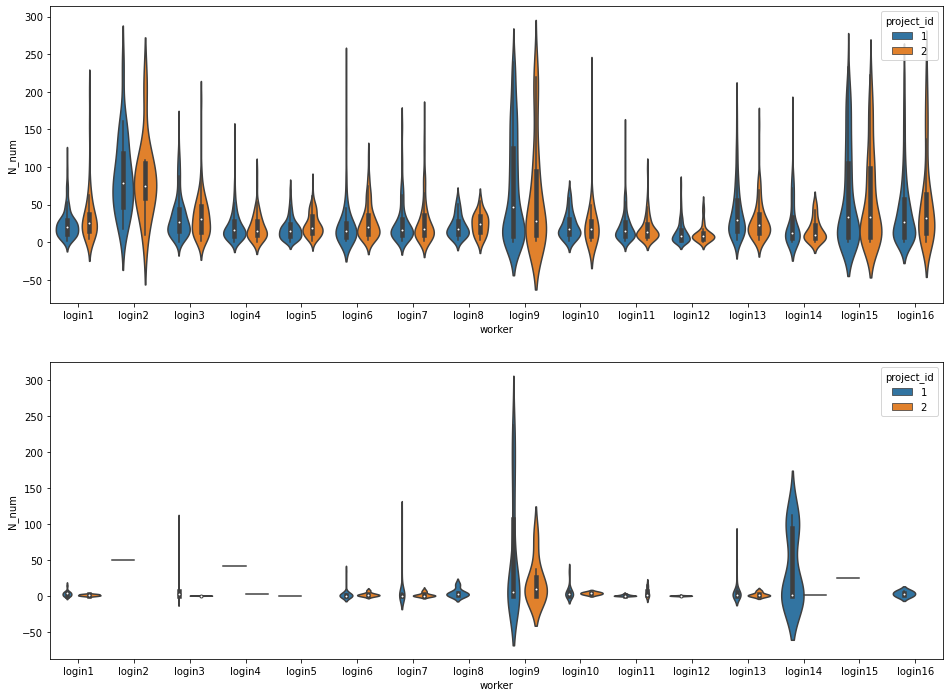

In [67]:
fig = plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
sns.violinplot(x='worker',hue='project_id', y='N_num', data=data[data.resolution_type == 'resolution_1'])
plt.subplot(2, 1, 2)
sns.violinplot(x='worker',hue='project_id', y='N_num', data=data[data.resolution_type == 'resolution_2'])
plt.show()

Решений второго типа не так много - объеденим их статистику.

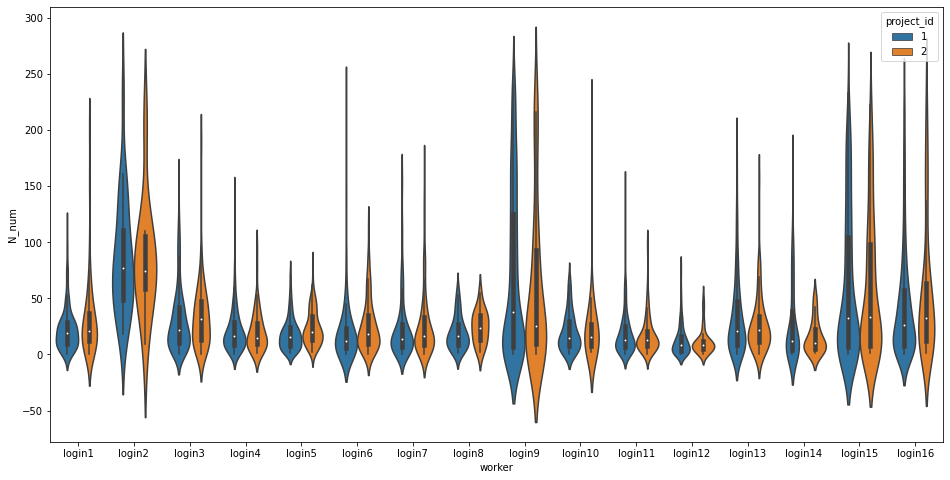

In [66]:
fig = plt.figure(figsize=(16,8))
sns.violinplot(x='worker',hue='project_id', y='N_num', data=data)
plt.show()

Из графиков видно, что поведение ассесоров № 2, 9, 15 и 16 отличаются. Все они имеют толстые хвосты в сторону больших значений, ассесор №2 также имеет заметно смещенную медиану.
При посчете оплаты стстистика по "аномальным" работникам не будет учитываться.
Длинные и тонкие хвосты прочих ассесоров - это единичные случаи, которые можно объяснить перерывами в работе.

In [75]:
data = data[~data.worker.isin(['login2', 'login9', 'login15', 'login16'])]

Найдем медиану в качестве оценки.

In [84]:
n1 = np.round(data[data.project_id == 1].N_num.median(),2)
n2 = np.round(data[data.project_id == 2].N_num.median(),2)
print(f'Оплата за задание из проекта 1: {n1}*N \nОплата за задание из проекта 2: {n2}*N')

Оплата за задание из проекта 1: 15.23*N 
Оплата за задание из проекта 2: 16.03*N
